In [1]:
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress
import time

In [2]:
# create the base url
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

### Generate Random Cities

In [3]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# create a list for holding cities
cities = []

# identify the nearest city for each latitude and longitude combination
for c in coordinates: 
    lat, lng = c[0], c[1]
    city = citipy.nearest_city(lat, lng).city_name
    
    if city not in cities:
        # if the name is unique, then add to the cities list
        cities.append(city)

# print the city count to confirm sufficient count
print(f'Number of cities: {len(cities)}')

Number of cities: 612


### Initialize an Empty List and Counters
### Loop through the List of Cities and Build the City URL

In [6]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the loutput_data_fileprint('Beginning data retrieval    ')
print('----------------------------')

# create counters
record_count = 1
set_count = 1

# loop through all cities in our list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if i%50 == 0 and i >= 50:
        print('pausing...')
        print('----------------------------\n')
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # create endpoint url with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # log the url, record and set numbers and the city
    print(f'Processing record {record_count} of set {set_count} | {city}.')
    record_count += 1

    try: 
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # append the information to the city_data list
        city_data.append(
            {
                'City': city.title(),
                'Lat': city_lat,
                'Lng': city_lng,
                'Max Temp': city_max_temp,
                'Humidity': city_humidity,
                'Cloudiness': city_clouds,
                'Wind Speed': city_wind,
                'Country': city_country,
                'Date': city_date
            }
        )
    except:
        print('City not found. Skipping...')
        pass

# indicate that data loading is complete
print('----------------------------')
print('Data retrieval complete     ')
print('----------------------------')

----------------------------
Processing record 1 of set 1 | dingle.
Processing record 2 of set 1 | dhidhdhoo.
Processing record 3 of set 1 | airai.
Processing record 4 of set 1 | amapa.
Processing record 5 of set 1 | kyra.
Processing record 6 of set 1 | mataura.
Processing record 7 of set 1 | vaini.
Processing record 8 of set 1 | new norfolk.
Processing record 9 of set 1 | samusu.
City not found. Skipping...
Processing record 10 of set 1 | carballo.
Processing record 11 of set 1 | shchigry.
Processing record 12 of set 1 | ancud.
Processing record 13 of set 1 | mitsamiouli.
Processing record 14 of set 1 | acapulco.
Processing record 15 of set 1 | tasiilaq.
Processing record 16 of set 1 | brigantine.
Processing record 17 of set 1 | ruyigi.
Processing record 18 of set 1 | nabire.
Processing record 19 of set 1 | atuona.
Processing record 20 of set 1 | mahebourg.
Processing record 21 of set 1 | yellowknife.
Processing record 22 of set 1 | kavieng.
Processing record 23 of set 1 | khorixas.
P

### Save the `city_data` List as a Pandas DataFrame; Create an output csv file

In [7]:
# convert the list of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-05-08 17:54:10,10.9995,122.6711,78.53,86,46,8.16
1,Dhidhdhoo,MV,2022-05-08 17:54:10,6.8833,73.1000,85.23,73,99,17.20
2,Airai,TL,2022-05-08 17:54:11,-8.9266,125.4092,58.42,90,57,3.53
3,Amapa,BR,2022-05-08 17:54:11,1.0000,-52.0000,77.90,94,100,3.20
4,Kyra,RU,2022-05-08 17:54:12,49.5776,111.9753,50.61,36,79,6.24
5,Mataura,NZ,2022-05-08 17:54:13,-46.1927,168.8643,50.49,97,88,1.70
6,Vaini,TO,2022-05-08 17:54:14,-21.2000,-175.2000,73.56,88,20,6.91
7,New Norfolk,AU,2022-05-08 17:54:14,-42.7826,147.0587,42.71,78,22,2.44
8,Carballo,ES,2022-05-08 17:54:15,43.2130,-8.6910,80.02,68,34,3.02
9,Shchigry,RU,2022-05-08 17:54:16,51.8755,36.9043,60.62,79,78,7.27


In [9]:
# create the output csv file
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label='City_ID')

### Plot the Data

In [10]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# get today's date
today = time.strftime('%x')

#### Plot Latitude vs Max Temperature

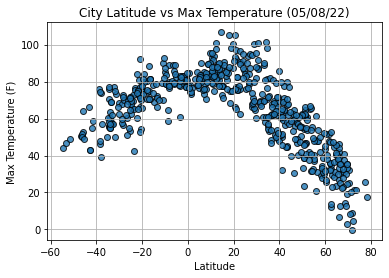

In [11]:
# build the scatter plot 
plt.scatter(
    lats, 
    max_temps,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show the plot 
plt.show()

#### Plot Latitude vs Humidity

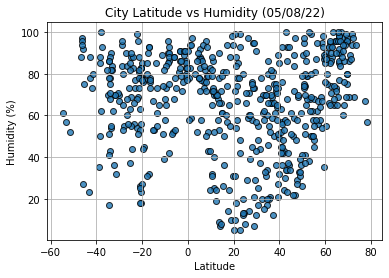

In [12]:
# build the scatter plot for 
plt.scatter(
    lats, 
    humidity,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({today})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig2.png')

# show the plot 
plt.show()

#### Plot Latitude vs Cloudiness

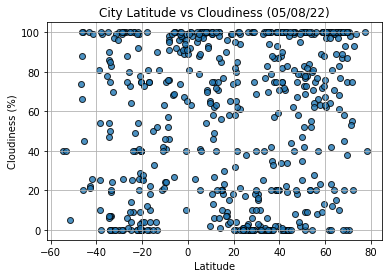

In [13]:
# build the scatter plot 
plt.scatter(
    lats, 
    cloudiness,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig3.png')

# show the plot 
plt.show()

#### Plot Latitude vs Wind Speed

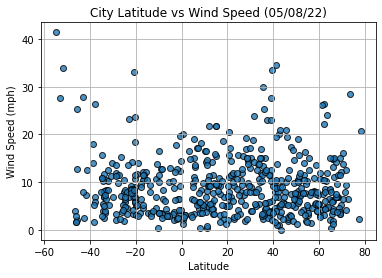

In [14]:
# build the scatter plot 
plt.scatter(
    lats, 
    wind_speed,
    edgecolor='black',
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'
)

# incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig4.png')

# show the plot 
plt.show()

### Find the Correlation Between Latitude and Maxmimum Temperature

#### Create a Linear Regression Function

In [15]:
# create a function to perform linear regress on the weather data and plot a regression line as well as the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates=None, figure_size=(12,8)):
    # perform linear regression 
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    # caluclate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # get the equation of the line
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
      
    # adjust the figure's size
    plt.figure(figsize=figure_size)

    # create a scatter plot of the x- and y-values
    plt.scatter(x_values, y_values)
    # plot the regression line with the x-values and the y-coordinates based on the intercept and slope
    plt.plot(x_values, regress_values, 'r')
    
    # adjust the text_coordinates based on the input data; mostly this will be 'out of the way', but could use improvement
    if text_coordinates is None: 
        x_bottom, x_top = plt.xlim()
        y_bottom, y_top = plt.ylim()
        text_coordinates = (
            max(x_top * 0.25, 0) if min(x_values) >= 0 else x_bottom * 0.25,
            max(y_top * 0.25, y_bottom * 1.25)
        )
    
    # annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

#### Create Hemisphere DataFrames

In [16]:
northern_hemisphere_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemisphere_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

#### Perform Linear Regression on Max Temperature for Northern Hemisphere

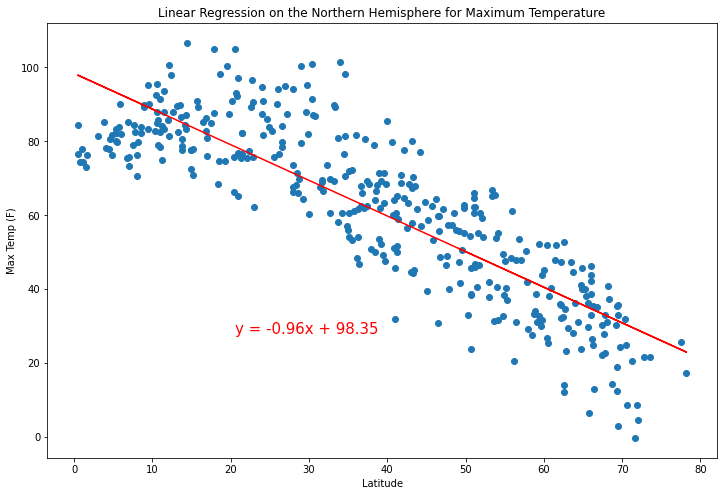

In [17]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for Maximum Temperature',
    y_label='Max Temp (F)'
)

#### Perform Linear Regression on Max Temperature for Southern Hemisphere

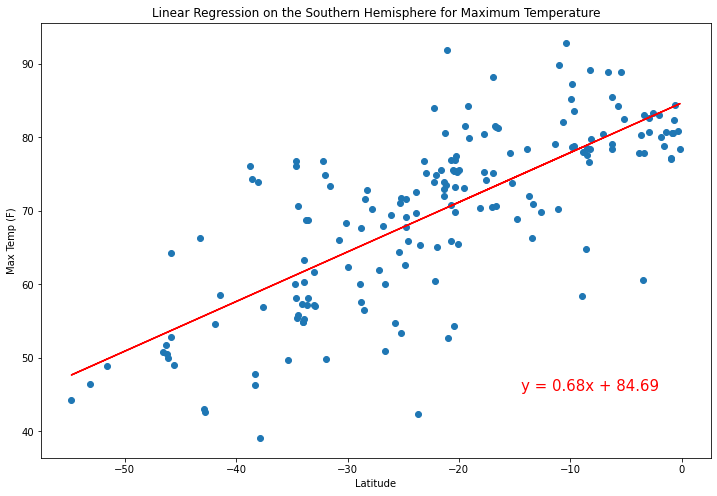

In [18]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for Maximum Temperature',
    y_label='Max Temp (F)'
)

#### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

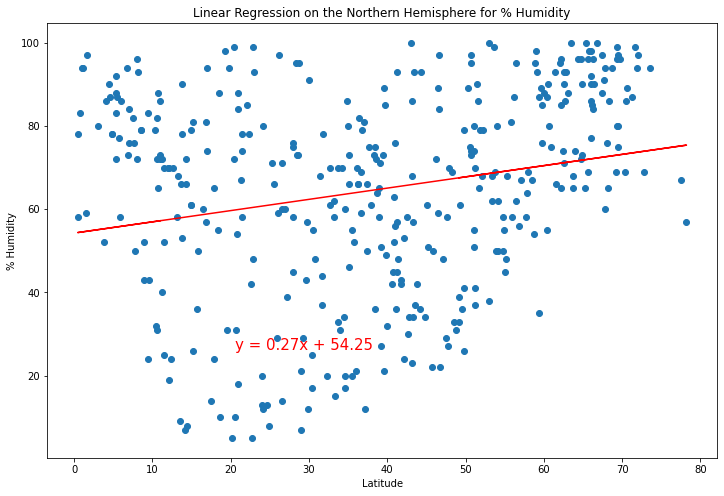

In [19]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for % Humidity',
    y_label='% Humidity'
)

#### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

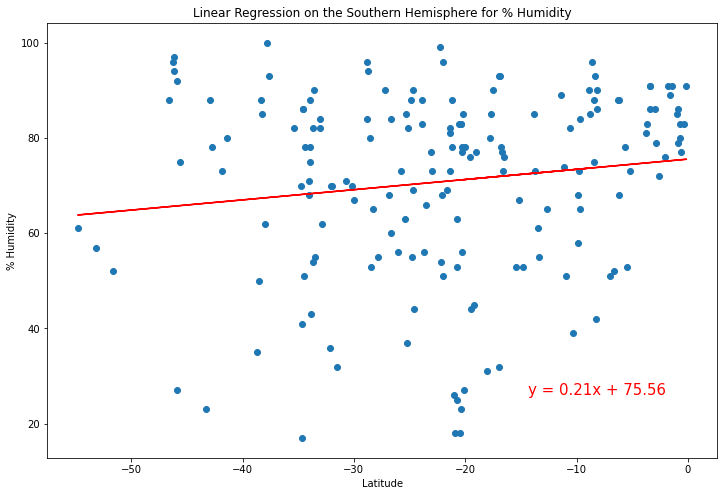

In [20]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for % Humidity',
    y_label='% Humidity'
)

#### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

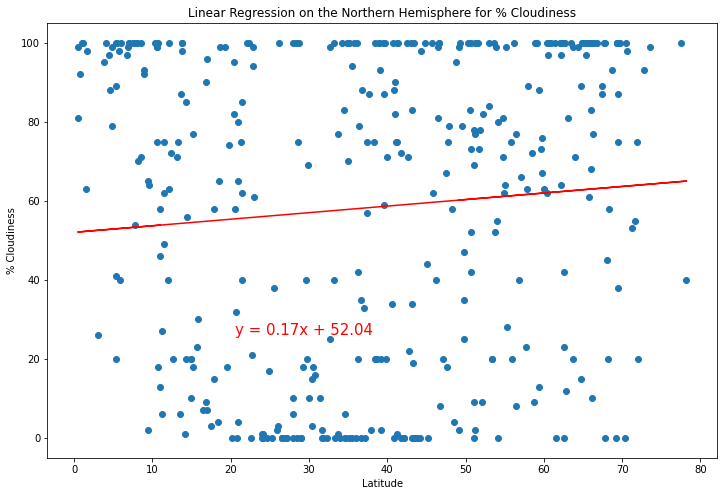

In [21]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for % Cloudiness',
    y_label='% Cloudiness'
)

#### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

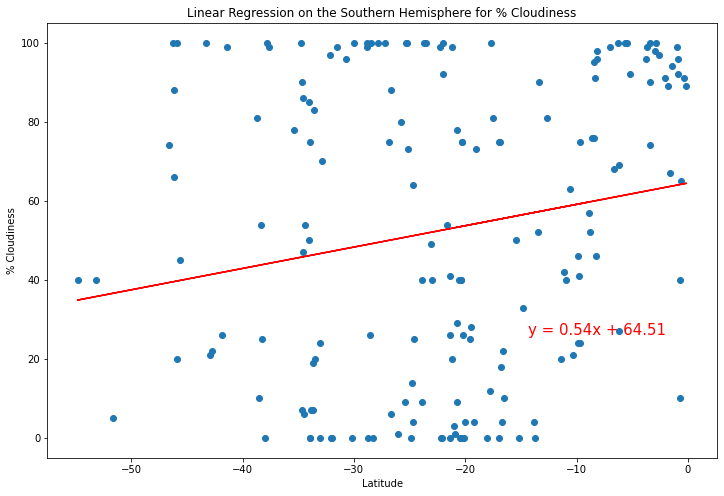

In [22]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for % Cloudiness',
    y_label='% Cloudiness'
)

#### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

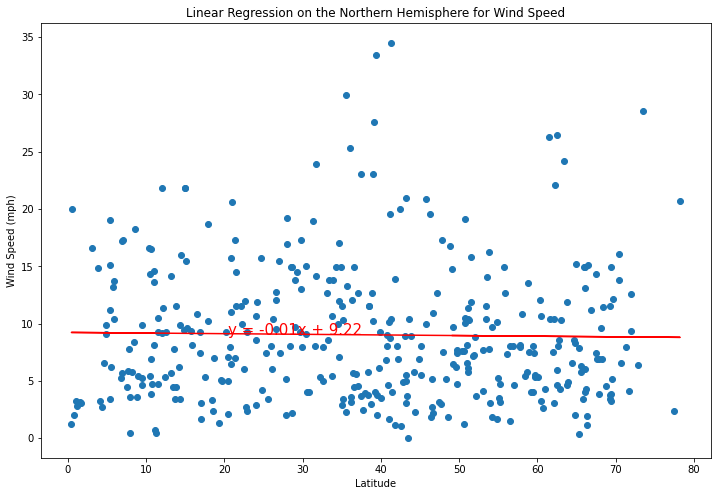

In [23]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Northern Hemisphere ' \
    'for Wind Speed',
    y_label='Wind Speed (mph)'
)

#### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

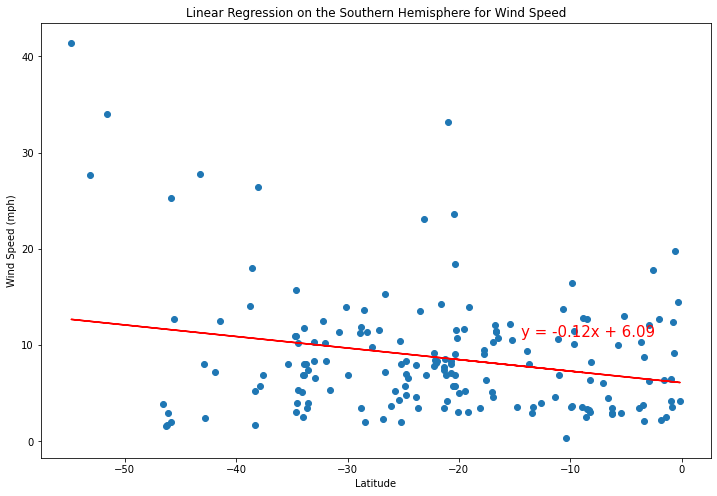

In [24]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
plot_linear_regression(
    x_values=x_values, 
    y_values=y_values, 
    title='Linear Regression on the Southern Hemisphere ' \
    'for Wind Speed',
    y_label='Wind Speed (mph)'
)